In [30]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('Test3_Full_Original.csv',
            delimiter=',', names=['x', 'y', 'Magicv2', 'localization4', 'localizationlab', 'Magicv2_5g', 'UVIC_Eduroam1', 'UVIC_Eduroam2', 'localization3', 'localization_lab5g', 'localization1', 'localization4_5g', 'UVIC_Eduroam3', 'localization2', 'localization3_5g', 'UVIC_Eduroam4', 'localization1_5g'])
df = df.loc[:,['x','y','Magicv2', 'localization4', 'localizationlab', 'Magicv2_5g', 
       'localization3', 'localization_lab5g', 'localization1', 'localization4_5g', 'localization2',
       'localization3_5g', 'localization1_5g']]

df['Average'] = (df.Magicv2 + df.localization4 + df.localizationlab + df.Magicv2_5g + df.localization3 + df.localization_lab5g + df.localization1 + df.localization4_5g + df.localization2 + df.localization3_5g + df.localization1_5g)/11

In [32]:
X = df.drop('Average', axis = 1)
y = df['Average']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)

In [41]:
reg = MLPRegressor(hidden_layer_sizes=(30,30,30),activation="relu" ,random_state=1, max_iter=2000).fit(x_train, y_train)

In [42]:
y_pred=reg.predict(x_test)
y_pred

array([-73.66940987, -74.08764233, -74.00877953, -74.03304972,
       -73.88036704, -74.30858464, -74.45584429, -74.50369452,
       -74.05666872, -73.57217731, -73.86763375, -73.74594367,
       -73.92376221, -74.04383137, -73.4648931 , -73.88183665,
       -74.60128371, -73.80765572, -73.60019209, -73.60019209,
       -73.09045344, -73.51183968, -72.95219852, -73.27605505,
       -75.651788  , -72.93020883, -72.75424438, -72.69882775,
       -72.34353746, -72.34353746, -72.86171626, -72.86171626,
       -72.76395892, -72.73767083, -72.95494547, -72.90929336,
       -73.61801985, -73.72795146, -73.27036797, -73.05681037,
       -73.05681037, -73.02672828, -72.84962156, -72.76412283,
       -72.04372545, -72.51192667, -71.35022851, -71.53408662,
       -71.37062884, -71.05210886, -71.37072929, -71.27205958,
       -71.33985879, -74.99199357, -71.86434089, -71.63381496,
       -72.01563334, -71.93342024, -72.17860692, -71.93342024,
       -71.68548807, -71.88426623, -72.10470445, -71.86

In [43]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

1.0323224641180981

In [44]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
496,-74.090909,-73.669410
497,-74.181818,-74.087642
498,-74.090909,-74.008780
499,-74.181818,-74.033050
500,-75.000000,-73.880367
...,...,...
615,-70.363636,-69.241098
616,-70.181818,-68.850495
617,-70.454545,-69.401744
618,-70.363636,-69.142106


In [45]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.9872074869504239
Mean Squared Error: 1.065689669922862
Root Mean Squared Error: 1.0323224641180981


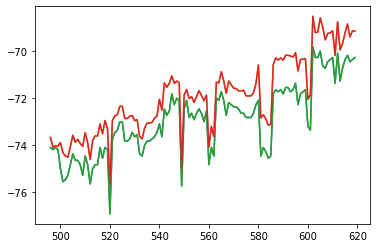

In [46]:
plt.plot(df.Actual.index, df.Actual)
plt.plot(df.Actual.index, df.Predicted)
plt.plot(df.Actual.index, df)
plt.show()